# Prosper Loan Dataset Exploration
## by Arjun Adhikari

## Investigation Overview

> In this project, I will be investigating the Prosper Loan Dataset. This dataset contains records of Loans made by Prosper during the time frame of 2008-2014. The dataset contains 100,000+ entries, and has several categories. My main interest is to understand what factors affect the loan amount and Interest Rates.

## Dataset Overview

> This is a financial dataset about loans. The dataset has 113937 rows and 81 columns. There are several data regarding the financial health of the borrower such as CreditGrade, Income, etc. 
> There is also information on the term of loan, APR, status, ratings, loan amount, etc. 
>It would be interesting to see the relationship between these variables. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

#Change the ListingCreationDate to datetime
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

#81 different variables are a lot, and I will only explore a selected variables that should affect the APR and LoanAmount
df_new = df[['ListingKey',                            
'ListingNumber',                         
'ListingCreationDate',                    
'LoanStatus',
'BorrowerAPR',
'LoanOriginalAmount',
'StatedMonthlyIncome',                               
'TotalInquiries',  'MonthlyLoanPayment',                                                                                               
'BankcardUtilization',                   
'AvailableBankcardCredit', 'ProsperRating (numeric)','ListingCategory (numeric)', 'ProsperScore', 'DebtToIncomeRatio', 'CreditScoreRangeUpper','Term',
'Investors','LoanNumber','TotalTrades','IncomeVerifiable','IncomeRange','EmploymentStatus', 'Occupation','BorrowerState']].copy()

df_2 = df_new.dropna()

df_2['StatedMonthlyIncome'] = df_2['StatedMonthlyIncome'].clip(0,30000)

#Get the year of the loan from the date
df_2['year'] = df_2['ListingCreationDate'].dt.year;

## The effect of time on the number of loans

> First I looked at the number of loans made by Prosper over the years. As it is clear from the chart there were nearly no loans made during 2009, which was the peak of the economic recession. However, starting 2010, the numbers of loans increased significantly due to an improving economic. 

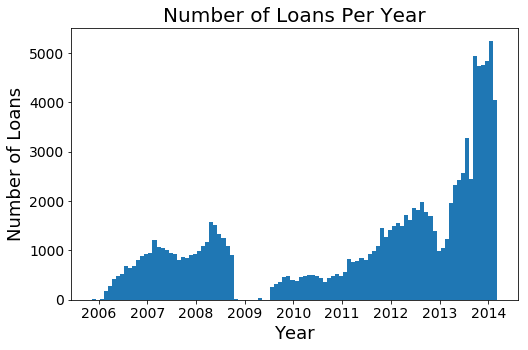

In [3]:
#Loan listing creation date
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'ListingCreationDate', bins = 100)
plt.xlabel('Year', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Number of Loans',fontsize = 18)
plt.yticks(fontsize=14)
plt.title('Number of Loans Per Year', fontsize = 20)
plt.show()

## Effect of Prosper Rating on the APR and Borrowed Amount 

> Two of the most important factors in a loan are perhaps the APR and the amount of loan. To determine which parameters affect these two factors, I looked at several factors, and found that the Prosper Score has a significant effect on these parameters. Moreover, it is also clear that it has a nearly linear (decreasing) effect on the APR, but the loan amount flattens out after a score of 4. We will explore this more later

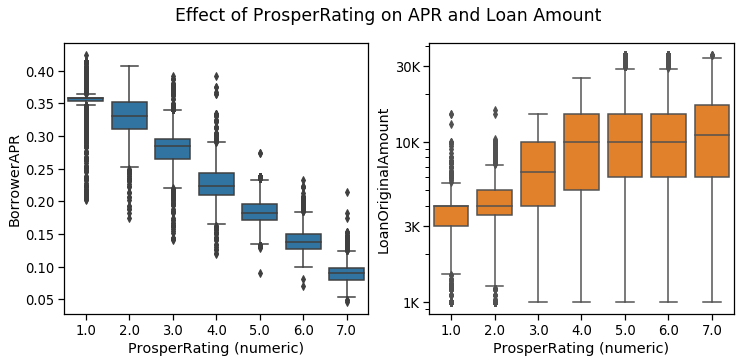

In [8]:

fig, axarr = plt.subplots(1, 2, figsize=(12, 5))
sns.set_context("notebook", font_scale=1.2)
sns.boxplot(x = 'ProsperRating (numeric)', y = 'BorrowerAPR', data = df_2,color = sns.color_palette()[0], ax=axarr[0]);
sns.boxplot(x = 'ProsperRating (numeric)', y = 'LoanOriginalAmount', data = df_2,color = sns.color_palette()[1], ax=axarr[1]);
plt.yscale('log')
plt.yticks([ 1e3, 3e3, 1e4, 3e4], [ '1K', '3K', '10K', '30K'])
fig.suptitle('Effect of ProsperRating on APR and Loan Amount');
#plt.tight_layout()

## Effect of Income Range on the APR and Borrowed Amount 

> A big deciding factor for the APR and the amount a lender will allow to borrow is the Income of the borrower. In this case I examined how the Income affects the APR and the Loan Amount. As it can be seen from the plots, higher income leads to lower APRs and larger loans. 



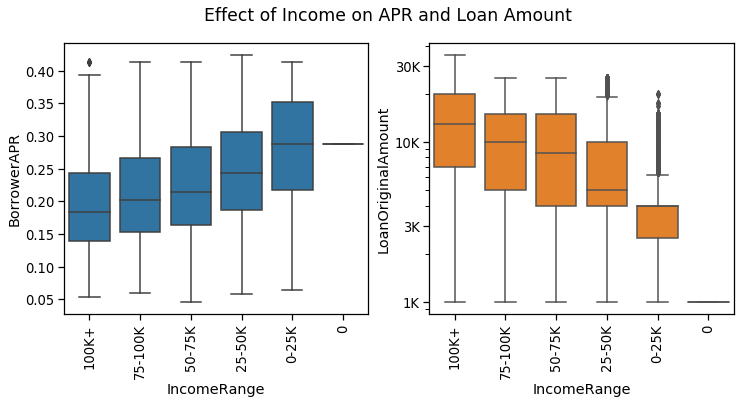

In [11]:
#Create Subplot
fig, axarr = plt.subplots(1, 2, figsize=(12, 5))
sns.set_context("notebook", font_scale=1.2)

#Numbers for indicies 
N = 6
ind = np.arange(N)

#plot
sns.boxplot(x = 'IncomeRange', y = 'BorrowerAPR', data = df_2,color = sns.color_palette()[0], ax=axarr[0],order=['$100,000+', '$75,000-99,999','$50,000-74,999', '$25,000-49,999', 
       '$1-24,999', 'Not employed']);
sns.boxplot(x = 'IncomeRange', y = 'LoanOriginalAmount', data = df_2,color = sns.color_palette()[1], ax=axarr[1],order=['$100,000+', '$75,000-99,999','$50,000-74,999', '$25,000-49,999', 
       '$1-24,999', 'Not employed']);

#Polish the plot
plt.sca(axarr[0])
plt.xticks(rotation=90)
plt.xticks(ind, ('100K+', '75-100K', '50-75K', '25-50K','0-25K', '0'))
plt.sca(axarr[1])
plt.xticks(rotation=90)
plt.xticks(ind, ('100K+', '75-100K', '50-75K', '25-50K','0-25K', '0'))
plt.yscale('log')#Plot the loan amount on a log scale to make the differences more apparent 
plt.yticks([ 1e3, 3e3, 1e4, 3e4],  [ '1K', '3K', '10K', '30K'])
fig.suptitle('Effect of Income on APR and Loan Amount');

## Effect of IncomeRange on LoanOriginalAmount and BorrowerAPR vs ProsperRating

> Next, I looked at see how the IncomeRange can alter LoanOriginalAmount and BorrowerAPR for different ProsperScores. 

> This multivariate analysis gives us a deeper insight than the bi-variate analysis in the previous plots. We can clearly see the following 
1. LoanOriginalAmount: There is no real affect of IncomeRange on Loan amount for lower ProsperScores, but for scores higher than 4, higher loans are given to borrowers with larger Incomes 
2. PropserScore: The income range does not alter the APR for a given ProsperScore. 

>We can conclude from the Bi-variate and multi-variate analysis the the ProsperScore is the most important determining factor for APR, whereas for the Loan Amount, both the Prosper Score and Income Range are important

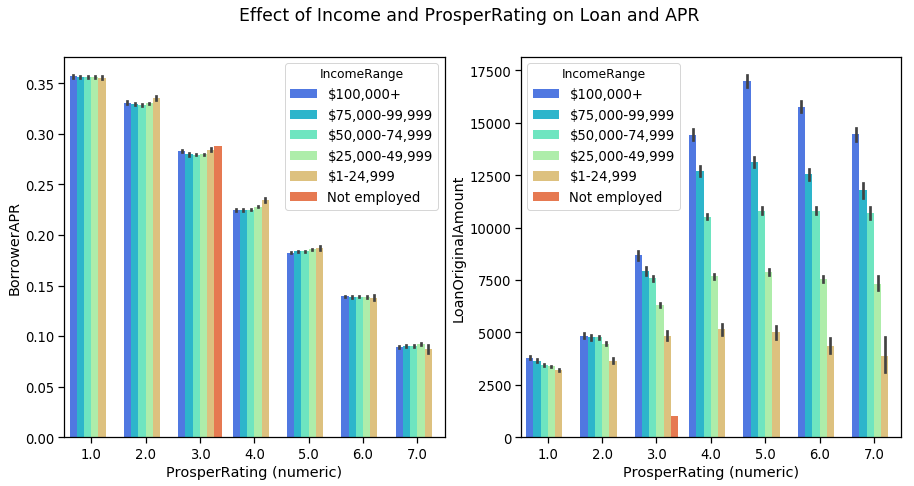

In [12]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 7))
sns.set_context("notebook", font_scale=1.2)
sns.barplot(x = 'ProsperRating (numeric)', y = 'BorrowerAPR', data = df_2,  hue ='IncomeRange',palette = "rainbow", ax=axarr[0], hue_order=['$100,000+', '$75,000-99,999','$50,000-74,999', '$25,000-49,999', 
       '$1-24,999', 'Not employed'] );
sns.barplot(x = 'ProsperRating (numeric)', y = 'LoanOriginalAmount', data = df_2,  hue ='IncomeRange',palette = "rainbow", ax=axarr[1],hue_order=['$100,000+', '$75,000-99,999','$50,000-74,999', '$25,000-49,999', 
       '$1-24,999', 'Not employed']);
fig.suptitle('Effect of Income and ProsperRating on Loan and APR');